In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,accuracy_score, r2_score

insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Veri setinde tekrarlayan değerler var mı diye bakalım:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
#Tekrarlayan değeri silelim:
df = df.drop_duplicates()
df.duplicated().sum()

0

## **Perform An Exploratory Data Analysis**

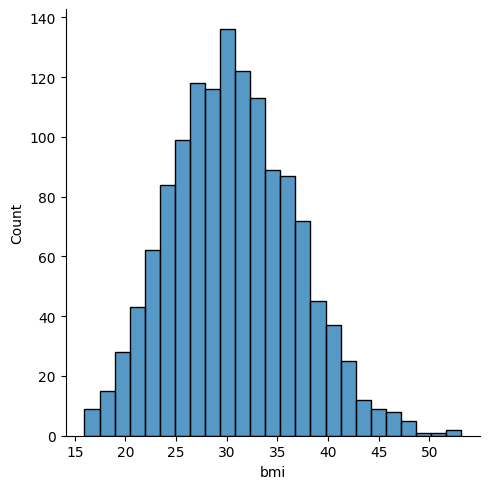

In [8]:
sns.displot(insurance, x = "bmi");

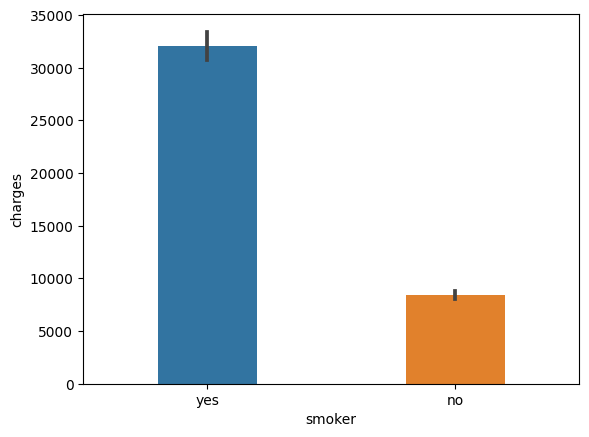

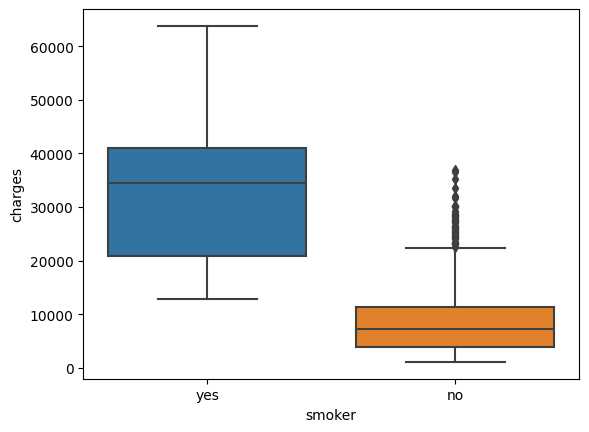

In [9]:
sns.barplot(data = df, x = "smoker", y = "charges", width=0.4)
plt.show()

sns.boxplot(data = df, x = "smoker", y = "charges")
plt.show()


İlk grafiğe göre sigara kullanan bireylerin bireysel tıbbi masrafları daha fazladır.
İkinci grafiğe yani aykırı değerlere baktığımız zaman ise sigara kullanmadığı halde tıbbi masrafları fazla olan bireyler vardır.


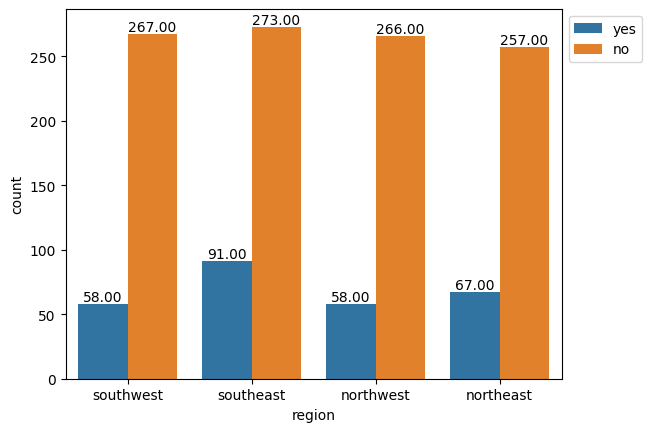

In [10]:
sns.countplot(data  =df, x = "region", hue = "smoker");
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

Grafiğe göre güneydoğu en çok sigara içenlerin ve aynı zamanda en az içenlerin olduğu bölgedir.

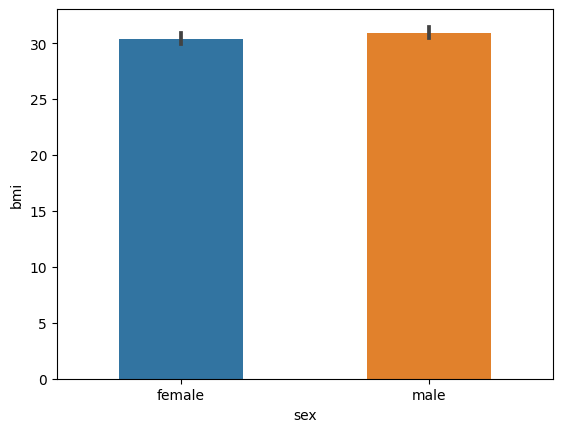

In [11]:
sns.barplot(data = df, x = "sex", y = "bmi", width=0.5);

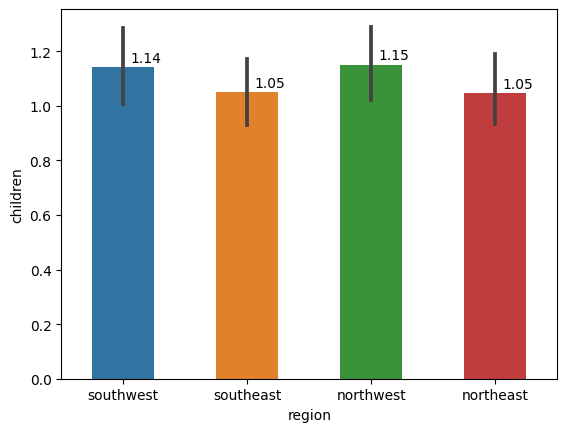

In [14]:
sns.barplot(data = df, x = "region", y = "children", width=0.5);
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(5, 4),
                textcoords='offset points')

Grafiğe göre kuzeybatı en çok çocuğun olduğu bölgedir ama bölgeler arasındaki çocuk sayı farkı çok azdır.

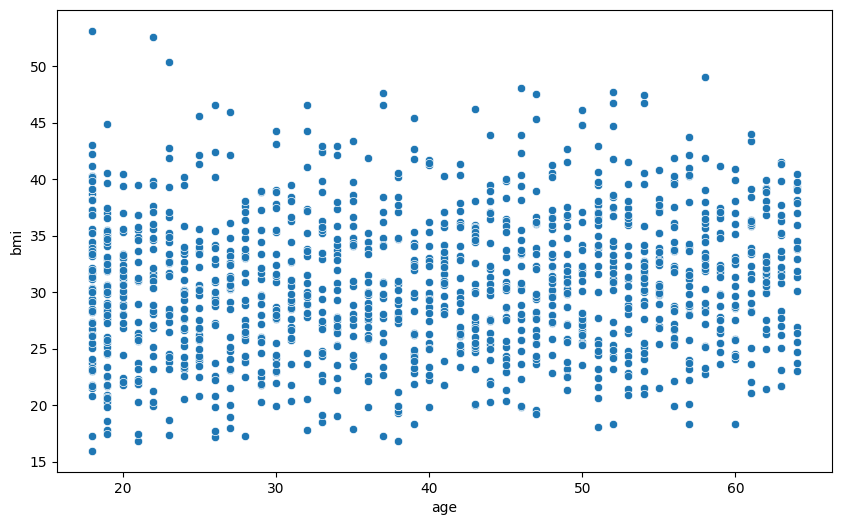

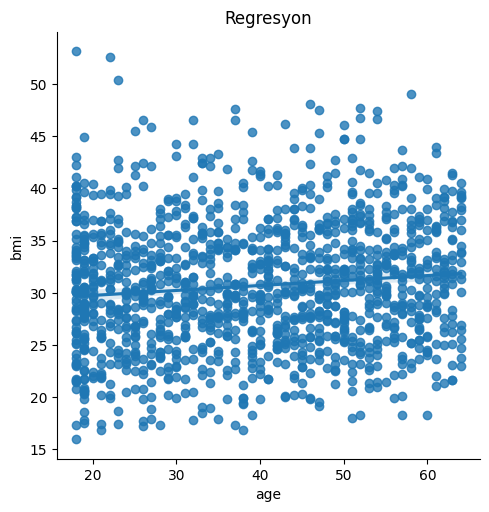



Korelasyon: 0.10934361041896887



In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df , x = "age", y = "bmi");
plt.show()
print("\n")

sns.lmplot(x='age', y='bmi', data=df)
plt.title("Regresyon")
plt.show()
print("\n")

cor = df["age"].corr(df["bmi"])
print(f"Korelasyon: {cor}\n")


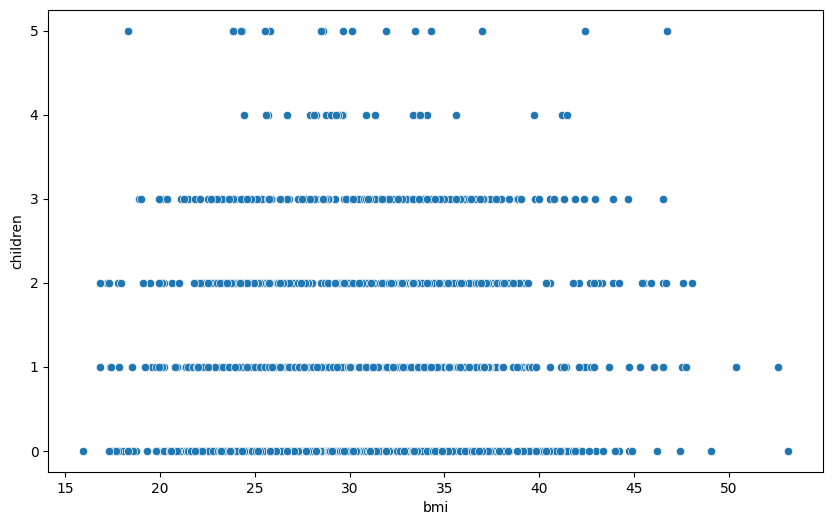

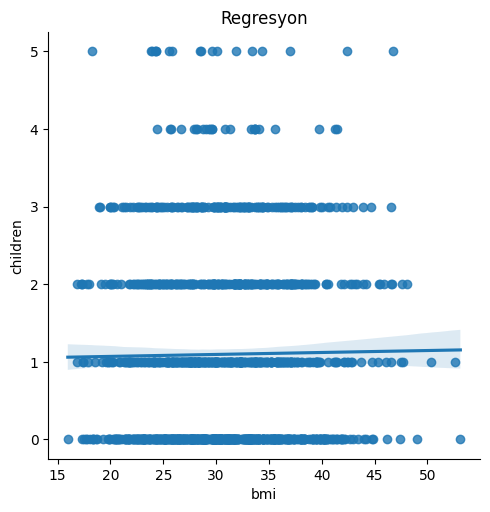



Korelasyon: 0.012754657513395214



In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= df, x="bmi", y="children" );
plt.show()
print("\n")

sns.lmplot(x='bmi', y='children', data=df)
plt.title("Regresyon")
plt.show()
print("\n")

cor = df["bmi"].corr(df["children"])
print(f"Korelasyon: {cor}\n")

Regresyon grafiğine ve korelasyon katsayısına göre bireylerin vücut kitle indeksi ile sahip oldukları çocuk sayısı arasında zayıf bir ilişki vardır.
İlişki neredeyse yok diyebiliriz.

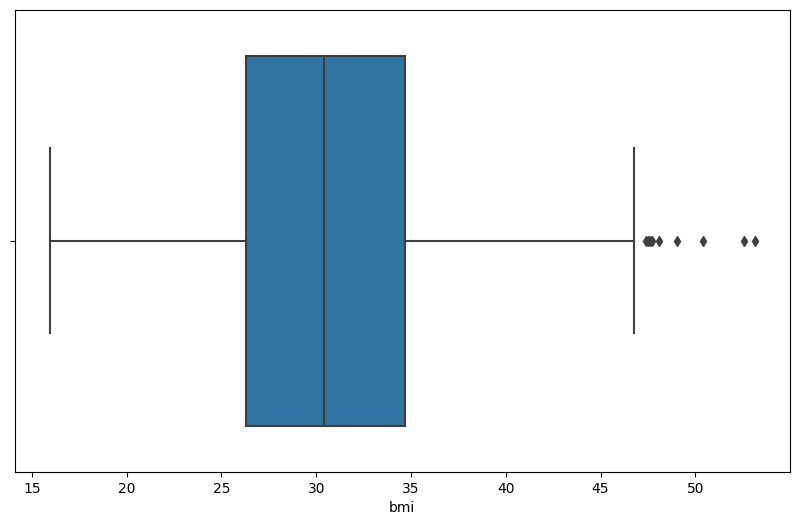

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["bmi"]);

Vücut kitle indeksi 47-55 değer aralığında aykırı değerlere sahiptir.

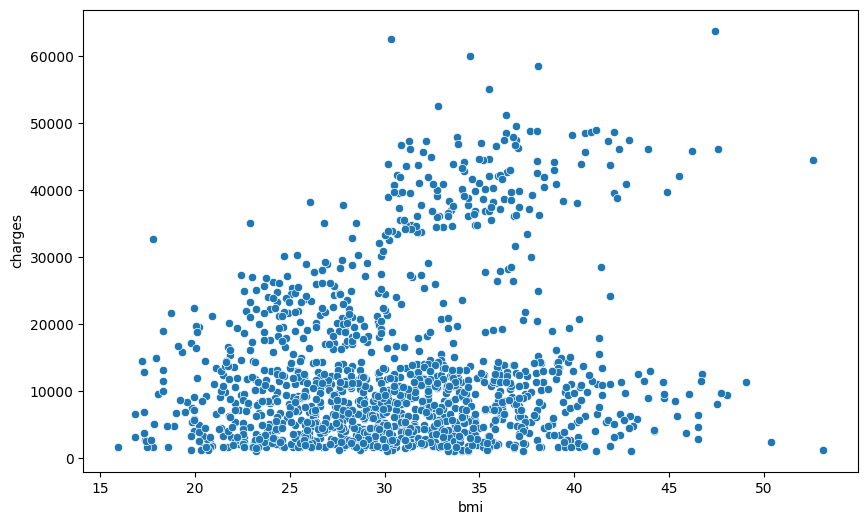

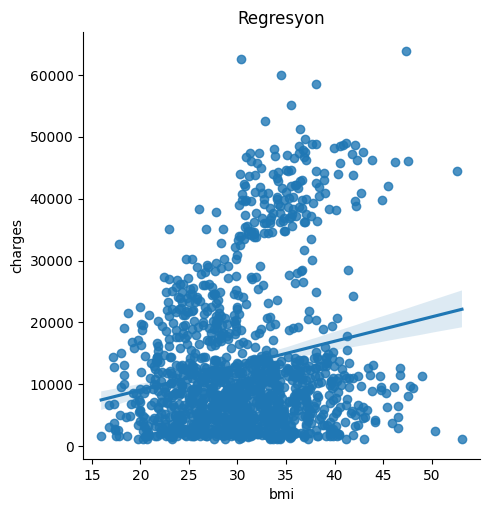



Korelasyon: 0.19840083122624938



In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df , x = "bmi", y = "charges");
plt.show()
print("\n")

sns.lmplot(x='bmi', y='charges', data=df)
plt.title("Regresyon")
plt.show()
print("\n")

cor = df["bmi"].corr(df["charges"])
print(f"Korelasyon: {cor}\n")

Grafiklere ve korelasyon katsayısına baktığımız zaman vücut kitle indeksi ile tıbbi masraflar arasında güçlü bir ilişki vardır.
Bireylerin vücut kitle indeksi arttıkça tıbbi masraflarıda artar.

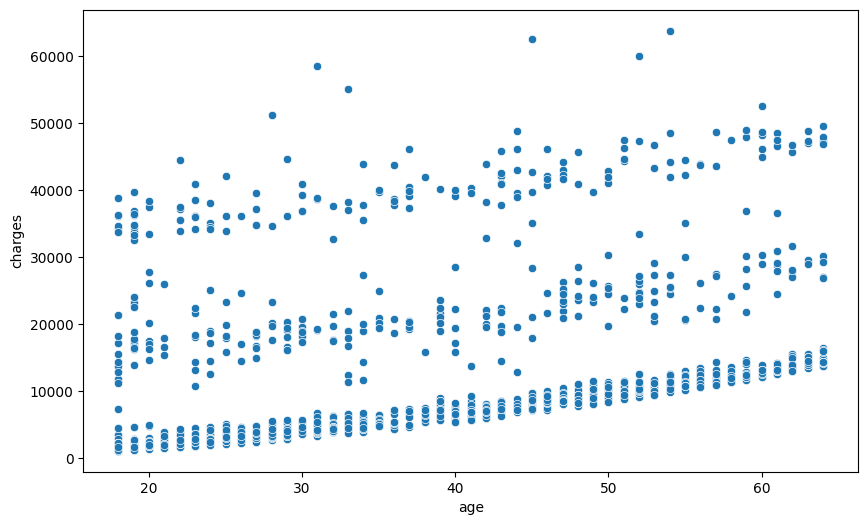

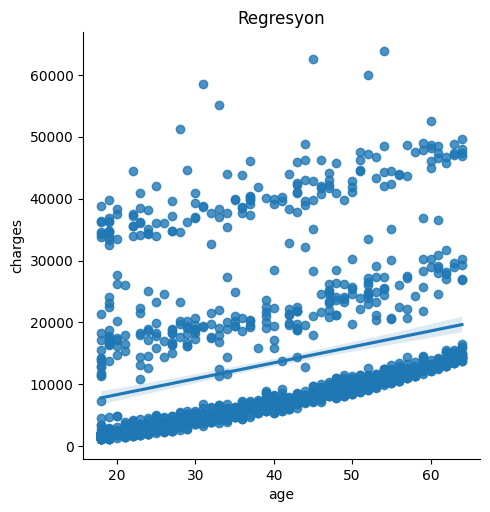



Korelasyon: 0.2983082125097864



In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df , x = "age", y = "charges");
plt.show()
print("\n")

sns.lmplot(x='age', y='charges', data=df)
plt.title("Regresyon")
plt.show()
print("\n")

cor = df["age"].corr(df["charges"])
print(f"Korelasyon: {cor}\n")

Grafiklere ve korelasyon katsayısına baktığımız zaman yaş ile tıbbi masraflar arasında güçlü bir ilişki vardır.
Bireylerin yaşı arttıkça tıbbi masraflarıda artar.

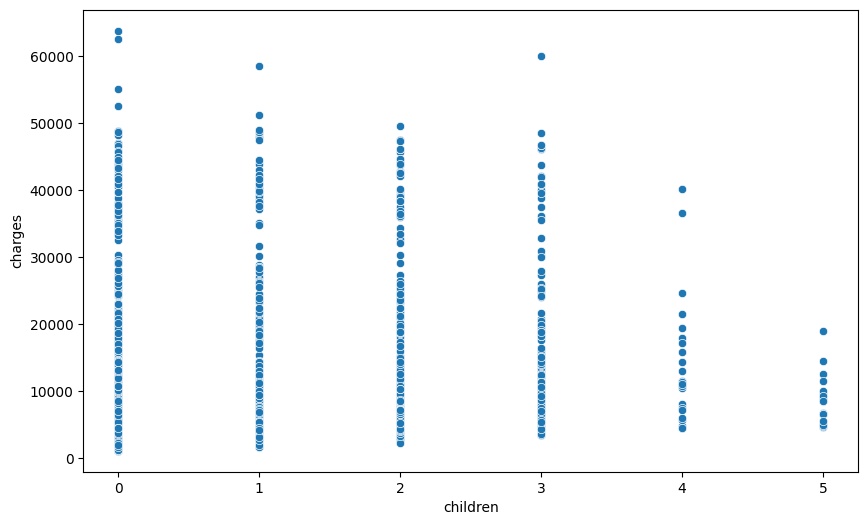

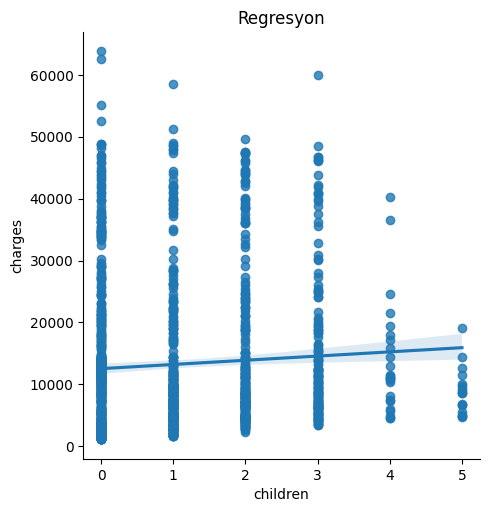

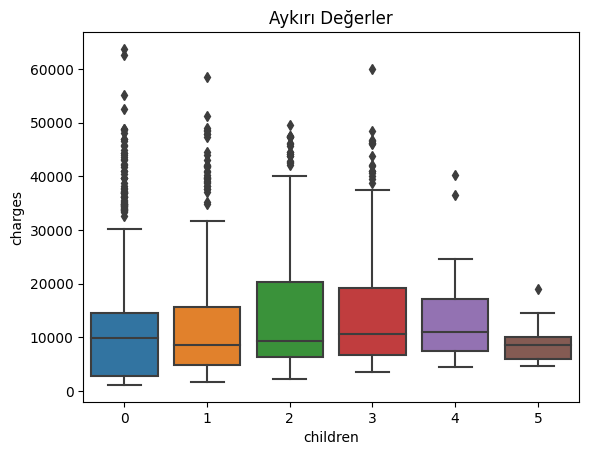



Korelasyon: 0.06738935083963243



In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df , x = "children", y = "charges");
plt.show()
print("\n")

sns.lmplot(x='children', y='charges', data=df)
plt.title("Regresyon")
plt.show()
print("\n")

sns.boxplot(data = df, x = "children", y = "charges")
plt.title("Aykırı Değerler")
plt.show()
print("\n")

cor = df["children"].corr(df["charges"])
print(f"Korelasyon: {cor}\n")

Grafiklere baktığımızda çocuğu olmayan bireylerin tıbbi masrafları daha fazladır.
Bireylerin sahip olduğu çocuk sayısı arttıkça tıbbi masraflarında arttığını söyleyemeyiz.

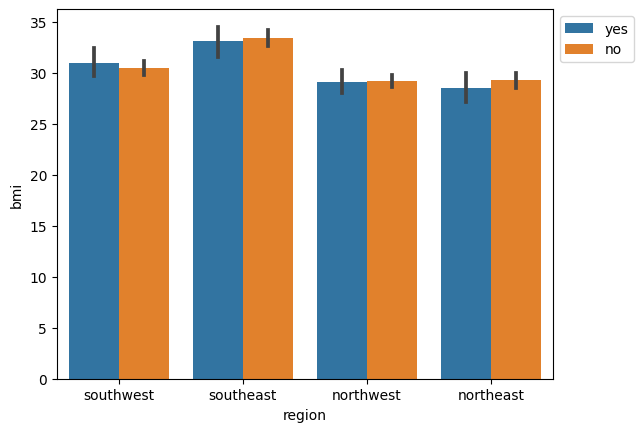

In [21]:
sns.barplot(data = df, x = "region", y = "bmi", hue = "smoker")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

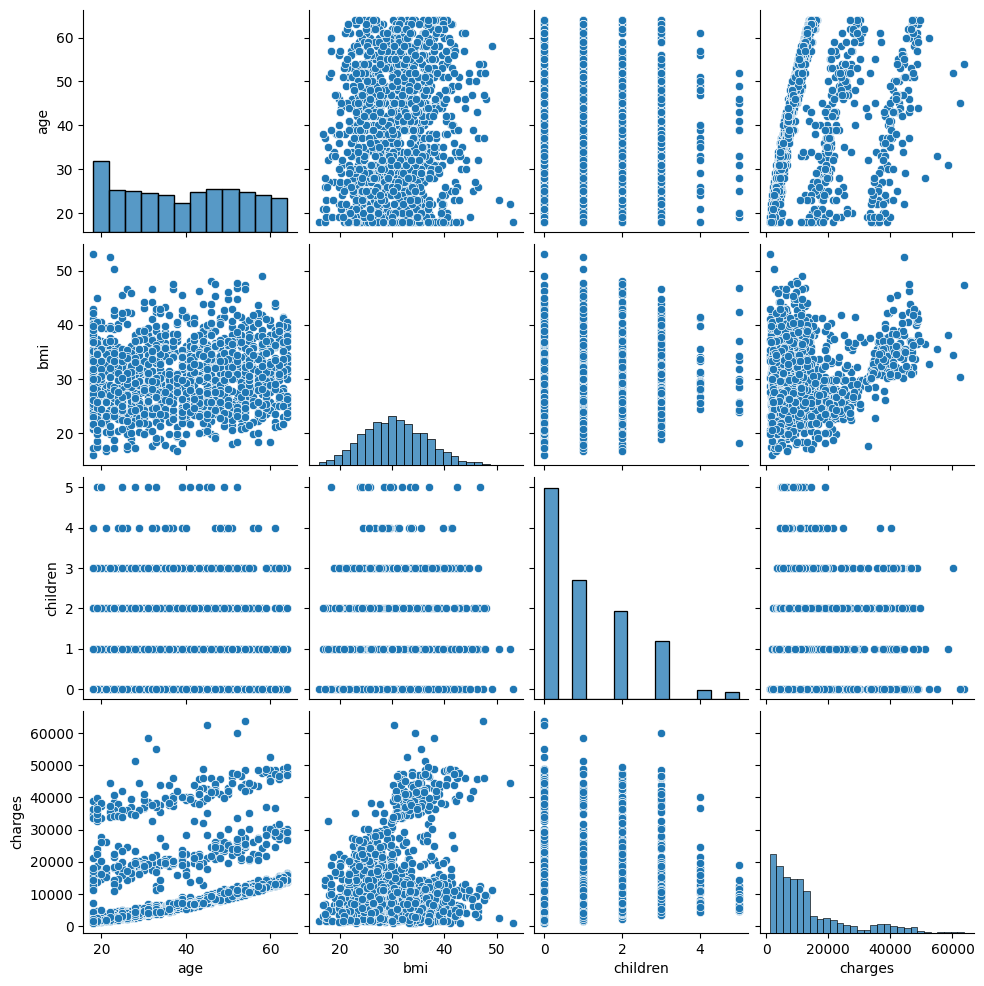

In [22]:
sns.pairplot(df)

Yaş ve tıbbi masraflar grafiğinde 3 tane kümelenme gözüküyor.

Aşağıdaki grafiğe bakarak yukarıdaki yaş ve tıbbi masraflar grafiğinde görülen
kümelenmenin sebebinin sigara içme durumundan kaynaklandığı görülüyor ve vücut kitle indeksi ile tıbbi masraflar grafiğindeki iki farklı dağılım ise yine sigara içme durumundan kaynaklandığı görülüyor.



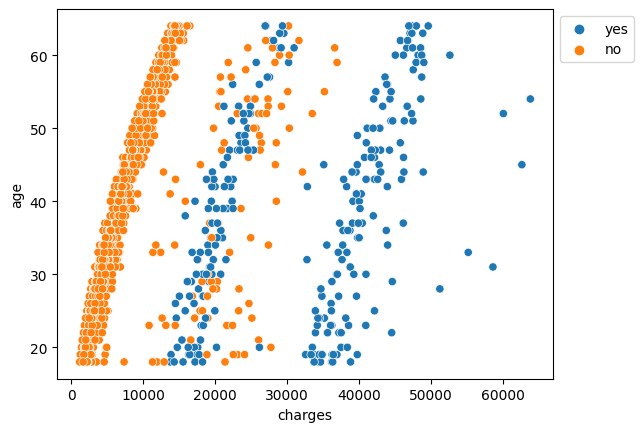

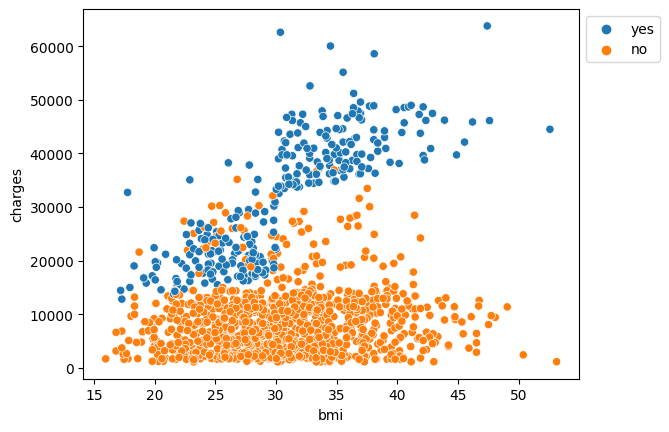

In [23]:
sns.scatterplot(data = df, x = "charges", y = "age", hue = "smoker")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

sns.scatterplot(data = df, x = "bmi", y = "charges", hue = "smoker")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Data Preprocessing**

In [24]:
df["region"] = df["region"].astype("category")
df["region"] = df["region"].cat.codes
df.tail()
# northeast = 0
# northwest = 1
# southeast = 2
# southwest = 3

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,1,10600.5483
1334,18,female,31.92,0,no,0,2205.9808
1335,18,female,36.85,0,no,2,1629.8335
1336,21,female,25.80,0,no,3,2007.9450
1337,61,female,29.07,0,yes,1,29141.3603


In [25]:
df["sex"] = df["sex"].astype("category")
df["sex"] = df["sex"].cat.codes
df.tail()
# male = 1
#female = 0

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,no,1,10600.5483
1334,18,0,31.92,0,no,0,2205.9808
1335,18,0,36.85,0,no,2,1629.8335
1336,21,0,25.80,0,no,3,2007.9450
1337,61,0,29.07,0,yes,1,29141.3603


In [26]:
df["smoker"] = df["smoker"].astype("category")
df["smoker"] = df["smoker"].cat.codes
df.tail()
# no = 0
# yes = 1

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [27]:
X = df.drop(columns = "charges")
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Model Selection**

In [30]:
#Linear Regression

LinearRegression_model=LinearRegression(fit_intercept=True,copy_X=True, n_jobs=None)
LinearRegression_model.fit(X_train,y_train)
print("Score the X-train with Y-train is : ", LinearRegression_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LinearRegression_model.score(X_test,y_test))

y_pred_LR=LinearRegression_model.predict(X_test)

Score the X-train with Y-train is :  0.7297182858804965
Score the X-test  with Y-test  is :  0.8068466322629112


In [31]:
#XGB Regressor Model

XGB_model=XGBRegressor(n_estimators=35,max_depth=7,min_child_weight=1,subsample=1,colsample_bytree=1,
                   learning_rate=0.18)

XGB_model.fit(X_train,y_train)
print("Score the X-train with Y-train is : ", XGB_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", XGB_model.score(X_test,y_test))

y_predXGB=XGB_model.predict(X_test)

Score the X-train with Y-train is :  0.9607352053081633
Score the X-test  with Y-test  is :  0.8838392415844858


## **Hyper-Parameter Optimization**

In [32]:
parameters_grid = {"max_depth" : [2, 10, 1],
                   "learning_rate" : [0.1, 0.01, 0.05],
                   "n_estimators" : [60,220,40],
                   "colsample_bytree" : [0.3, 0.7]
                  }

In [33]:
model = xgb.XGBRegressor(seed = 20)


In [34]:
grid = GridSearchCV(estimator = model,
                    param_grid = parameters_grid,
                    scoring = 'neg_mean_squared_error',
                    cv = 5,
                    verbose = 5)

In [35]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=60;, score=-71863298.430 total time=   0.0s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=60;, score=-58431443.809 total time=   0.0s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=60;, score=-50643325.479 total time=   0.0s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=60;, score=-51887028.808 total time=   0.0s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=60;, score=-64715189.663 total time=   0.0s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=220;, score=-45451585.526 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n_estimators=220;, score=-32941194.857 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=2, n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 10, 1],
                         'n_estimators': [60, 220, 40]},
             scoring='neg_mean_squared_error', verbose=5)

## **Model Evaluation**

In [37]:
#Linear regressor
from sklearn import metrics
L_MAE= metrics.mean_absolute_error(y_test, y_pred_LR)
L_MSE=metrics.mean_squared_error(y_test, y_pred_LR)
L_RMSE= np.sqrt(L_MSE)
L_R2 = r2_score(y_test, y_pred_LR)

print(f"Linear Regression MAE : {L_MAE}")
print(f"Linear Regression MSE : {L_MSE}")
print(f"Linear Regression RMSE : {L_RMSE}")
print(f"Linear Regression R2 Score :  {L_R2}")

Linear Regression MAE : 4182.353155288296
Linear Regression MSE : 35493102.61165051
Linear Regression RMSE : 5957.608799816459
Linear Regression R2 Score :  0.8068466322629112


In [39]:
#XGB regressor
X_MAE= metrics.mean_absolute_error(y_test, y_predXGB)
X_MSE=metrics.mean_squared_error(y_test, y_predXGB)
X_RMSE= np.sqrt(X_MSE)
X_R2 = r2_score(y_test, y_predXGB)

print(f"XGB Regressor MAE: {X_MAE}")
print(f"XGB Regressor MSE: {X_MSE}")
print(f"XGB Regressor RMSE: {X_RMSE}")
print(f"XGB Regressor R2 Score :  {X_R2}")

XGB Regressor MAE: 2479.5913076249703
XGB Regressor MSE: 21345243.762463912
XGB Regressor RMSE: 4620.091315381538
XGB Regressor R2 Score :  0.8838392415844858
